In [ ]:
#mounting to google colab
from google.colab import drive
drive.mount('/content/gdrive/')
%cd /content/gdrive/MyDrive/Data/

Mounted at /content/gdrive/
/content/gdrive/MyDrive/Data


### Importing

In [ ]:
#important imports
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import confusion_matrix, mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

import sklearn.linear_model as skl_lm
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn import neighbors
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.svm import SVC

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import mean_squared_error

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import auc, RocCurveDisplay, accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
%matplotlib inline
plt.rcParams['figure.dpi'] = 70
plt.rcParams['savefig.dpi'] = 300

import seaborn as sns
sns.set_style('whitegrid')
sns.set(rc={"figure.dpi":70, 'savefig.dpi':300}) #defining dpi setting
sns.set_context('notebook')
sns.set_style("ticks")
from IPython.display import set_matplotlib_formats
%matplotlib inline

### Data

In [ ]:
#data cleaning
df2 = pd.read_csv('/content/marketing_campaign_cleaned.csv', na_values='?').dropna()
Q1 = df2['Income'].quantile(0.25)
Q3 = df2['Income'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df2_cleaned = df2[(df2['Income'] >= lower_bound) & (df2['Income'] <= upper_bound)].copy()

original_rows = df2.shape[0]
cleaned_rows = df2_cleaned.shape[0]
rows_removed = original_rows - cleaned_rows

print(f"Original number of rows: {original_rows}")
print(f"Number of rows after outlier removal: {cleaned_rows}")
print(f"Number of rows removed: {rows_removed}")
print()
median_income = df2_cleaned['Income'].median()
print(f"Median Income after outlier removal: {median_income}")

df2_cleaned.loc[:, 'Income_Category'] = df2_cleaned['Income'].apply(lambda x: 'low' if x < median_income else 'high')
display(df2_cleaned.head())

Original number of rows: 2216
Number of rows after outlier removal: 2208
Number of rows removed: 8

Median Income after outlier removal: 51301.0


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Income_Category
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,0,3,11,1,high
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,0,3,11,0,low
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,0,3,11,0,high
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,0,3,11,0,low
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,0,3,11,0,high


In [ ]:
#Variable mapping
from sklearn.preprocessing import LabelEncoder

X = df2_cleaned.loc[:,["MntWines","MntMeatProducts","NumWebVisitsMonth","Teenhome"]]
y = df2_cleaned.loc[:, ["Income_Category"]].values.ravel()

le = LabelEncoder()
y = le.fit_transform(y)

### Decision Tree Classifier (Full Data)

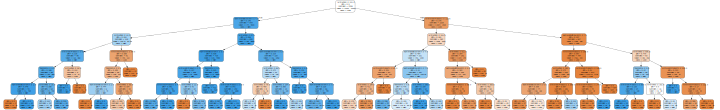

In [ ]:
#DT Display for full data
classification_tree = DecisionTreeClassifier(max_depth=6)
model = classification_tree.fit(X, y)
dot_data = export_graphviz(
    model,
    out_file=None,
    feature_names=X.columns,
    class_names=["Low", "High"],
    filled=True,
    rounded=True,
    special_characters=True
)

dot_data_with_size = dot_data.replace('digraph Tree {', 'digraph Tree {    size="10,10!";', 1)

graph = graphviz.Source(dot_data_with_size)
graph

In [ ]:
#Summary of DT for full data
import timeit
start_time = timeit.default_timer()
model = DecisionTreeClassifier()
model.fit(X, y)
y_pred_full = model.predict(X)
print(confusion_matrix(y, y_pred_full))
print(classification_report(y, y_pred_full, digits=3))
accuracy = accuracy_score(y, y_pred_full)
specificity = confusion_matrix(y, y_pred_full)[0, 0] / (confusion_matrix(y, y_pred_full)[0, 0] + confusion_matrix(y, y_pred_full)[0, 1])
sensitivity = confusion_matrix(y, y_pred_full)[1, 1] / (confusion_matrix(y, y_pred_full)[1, 0] + confusion_matrix(y, y_pred_full)[1, 1])
runtime = timeit.default_timer() - start_time

print(f"Accuracy {accuracy}")
print(f"Specficity {specificity}")
print(f"Sensitivity {sensitivity}")
print("Run time is %s seconds" % runtime)


[[1104    0]
 [   2 1102]]
              precision    recall  f1-score   support

           0      0.998     1.000     0.999      1104
           1      1.000     0.998     0.999      1104

    accuracy                          0.999      2208
   macro avg      0.999     0.999     0.999      2208
weighted avg      0.999     0.999     0.999      2208

Accuracy 0.9990942028985508
Specficity 1.0
Sensitivity 0.9981884057971014
Run time is 0.030763650000011467 seconds


             Predicted_high  Predicted_low
Actual_high            1104              0
Actual_low                2           1102


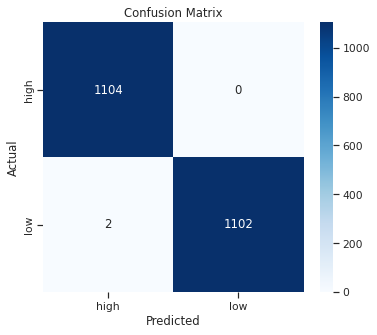

In [ ]:
#Confusion matrix display
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
labels_display = ['high', 'low']
labels_for_cm = [le.transform([label])[0] for label in labels_display]
pred = model.predict(X)
cm = pd.DataFrame(
    confusion_matrix(y, pred, labels=labels_for_cm),
    index=[f"Actual_{l}" for l in labels_display],
    columns=[f"Predicted_{l}" for l in labels_display]
)

print(cm)
def plot_confusion_matrix(y_true, y_pred, display_labels, title="Confusion Matrix"):
    numerical_labels_order = [le.transform([label])[0] for label in display_labels]
    cm = confusion_matrix(y_true, y_pred, labels=numerical_labels_order)

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=True,
                xticklabels=display_labels, yticklabels=display_labels)
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

plot_confusion_matrix(y, pred, labels_display)

### DT with data split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=2)

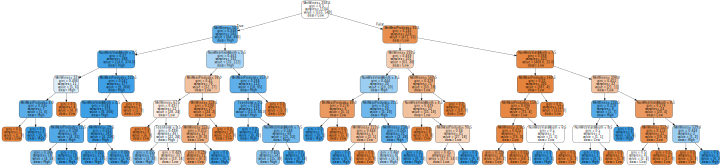

In [ ]:
#DT display for 50/50 data split
classification = DecisionTreeClassifier(max_depth=6)
clf_split = classification.fit(X_train, y_train)
dot_data = export_graphviz(
    clf_split,
    out_file=None,
    feature_names=X_train.columns,
    class_names=["Low", "High"],
    filled=True,
    rounded=True,
    special_characters=True
)
dot_data_with_size = dot_data.replace('digraph Tree {', 'digraph Tree {\n    size="10,10!";', 1)

graph = graphviz.Source(dot_data_with_size)
graph

In [ ]:
#summary for 50/50 split data on DT
start_time = timeit.default_timer()

model = DecisionTreeClassifier()
model.fit(X_train, y_train);

y_pred_val = model.predict(X_test)

print(confusion_matrix(y_test, y_pred_val))
print(classification_report(y_test, y_pred_val, digits=3))
accuracy = accuracy_score(y_test, y_pred_val)
specificity = confusion_matrix(y_test, y_pred_val)[0, 0] / (confusion_matrix(y_test, y_pred_val)[0, 0] + confusion_matrix(y_test, y_pred_val)[0, 1])
sensitivity = confusion_matrix(y_test, y_pred_val)[1, 1] / (confusion_matrix(y_test, y_pred_val)[1, 0] + confusion_matrix(y_test, y_pred_val)[1, 1])
runtime = timeit.default_timer() - start_time

print(f"Accuracy {accuracy}")
print(f"Specficity {specificity}")
print(f"Sensitivity {sensitivity}")
print("Run time is %s seconds" % runtime)


[[488  61]
 [ 64 491]]
              precision    recall  f1-score   support

           0      0.884     0.889     0.886       549
           1      0.889     0.885     0.887       555

    accuracy                          0.887      1104
   macro avg      0.887     0.887     0.887      1104
weighted avg      0.887     0.887     0.887      1104

Accuracy 0.8867753623188406
Specficity 0.8888888888888888
Sensitivity 0.8846846846846846
Run time is 0.03018910000000119 seconds


             Predicted_high  Predicted_low
Actual_high             488             61
Actual_low               64            491


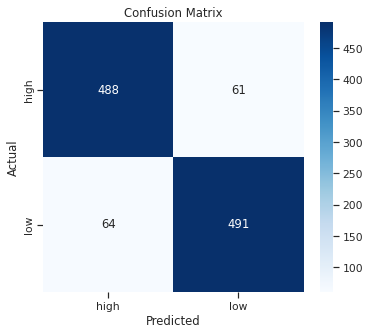

In [ ]:
#confusion matrix display
labels_display = ['high', 'low']
labels_for_cm = [le.transform([label])[0] for label in labels_display]
pred = model.predict(X_test)
cm = pd.DataFrame(
    confusion_matrix(y_test, pred, labels=labels_for_cm),
    index=[f"Actual_{l}" for l in labels_display],
    columns=[f"Predicted_{l}" for l in labels_display]
)
print(cm)
def plot_confusion_matrix(y_true, y_pred_val, display_labels, title="Confusion Matrix"):
    numerical_labels_order = [le.transform([label])[0] for label in display_labels]
    cm = confusion_matrix(y_true, y_pred_val, labels=numerical_labels_order)

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=True,
                xticklabels=display_labels, yticklabels=display_labels)
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
plot_confusion_matrix(y_test, pred, labels_display)

### DT 5-fold

In [ ]:
#Summary of 5-fold CV on DT
from sklearn.metrics import roc_auc_score, roc_curve
import timeit
start_time = timeit.default_timer()
acc_score = []
Truth = []
Output = []
crossvalidation = KFold(n_splits=5, random_state=2, shuffle=True)
for fold, (train_index, test_index) in enumerate(crossvalidation.split(X), 1):
    print(f"\nFold {fold}")
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model = DecisionTreeClassifier()
    model.fit(X_train, y_train)
    pred_values = model.predict(X_test)
    acc = accuracy_score(y_test, pred_values)
    acc_score.append(acc)
    Truth.extend(y_test)
    Output.extend(pred_values)
    print(confusion_matrix(y_test, pred_values))
    print(classification_report(y_test, pred_values, digits=3))
elapsed = timeit.default_timer() - start_time
print("\n--- Run time is %s seconds ---" % elapsed)
print('\nAccuracy of each fold: \n', acc_score)
print('\nAverage accuracy: \n', np.mean(acc_score))
print('\nStandard deviation of accuracy: \n', np.std(acc_score))

print(confusion_matrix(Truth, Output))
print(classification_report(Truth, Output, digits=3))
accuracy = accuracy_score(Truth, Output)
specificity = confusion_matrix(Truth, Output)[0, 0] / (confusion_matrix(Truth, Output)[0, 0] + confusion_matrix(Truth, Output)[0, 1])
sensitivity = confusion_matrix(Truth, Output)[1, 1] / (confusion_matrix(Truth, Output)[1, 0] + confusion_matrix(Truth, Output)[1, 1])
runtime = timeit.default_timer() - start_time

print(f"Accuracy {accuracy}")
print(f"Specficity {specificity}")
print(f"Sensitivity {sensitivity}")
print("Run time is %s seconds" % runtime)



Fold 1
[[214  16]
 [ 21 191]]
              precision    recall  f1-score   support

           0      0.911     0.930     0.920       230
           1      0.923     0.901     0.912       212

    accuracy                          0.916       442
   macro avg      0.917     0.916     0.916       442
weighted avg      0.916     0.916     0.916       442


Fold 2
[[187  29]
 [ 25 201]]
              precision    recall  f1-score   support

           0      0.882     0.866     0.874       216
           1      0.874     0.889     0.882       226

    accuracy                          0.878       442
   macro avg      0.878     0.878     0.878       442
weighted avg      0.878     0.878     0.878       442


Fold 3
[[183  24]
 [ 27 208]]
              precision    recall  f1-score   support

           0      0.871     0.884     0.878       207
           1      0.897     0.885     0.891       235

    accuracy                          0.885       442
   macro avg      0.884     0.885  

[[986 118]
 [113 991]]


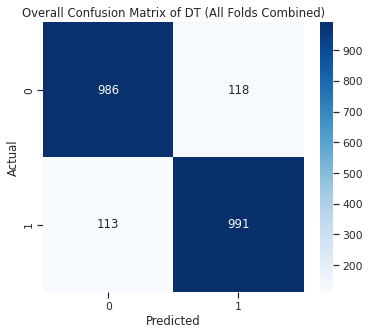

In [ ]:
#display of confusion matrix
cm = confusion_matrix(Truth, Output)
print(cm)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.title("Overall Confusion Matrix of DT (All Folds Combined)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


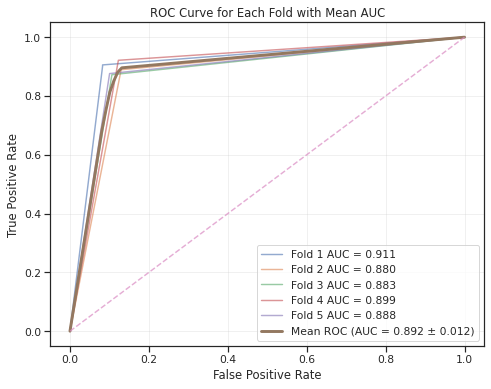

In [ ]:
#ROC curve for 5-fold cv on DT
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
cv = KFold(n_splits=5, random_state=2, shuffle=True)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
plt.figure(figsize=(8, 6))
for fold, (train_idx, test_idx) in enumerate(cv.split(X), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    model = DecisionTreeClassifier()
    model.fit(X_train, y_train)
    try:
        y_score = model.predict_proba(X_test)[:, 1]
    except:
        y_score = model.decision_function(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_score)
    fold_auc = auc(fpr, tpr)
    aucs.append(fold_auc)

    tpr_interp = np.interp(mean_fpr, fpr, tpr)
    tpr_interp[0] = 0.0
    tprs.append(tpr_interp)
    plt.plot(fpr, tpr, alpha=0.6, label=f"Fold {fold} AUC = {fold_auc:.3f}")

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)

plt.plot(
    mean_fpr,
    mean_tpr,
    linewidth=3,
    label=f"Mean ROC (AUC = {mean_auc:.3f} ± {std_auc:.3f})"
)

plt.plot([0, 1], [0, 1], linestyle="--", alpha=0.7)


plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Each Fold with Mean AUC")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()


### Bagging

In [ ]:
from sklearn.ensemble import BaggingClassifier
bagged = BaggingClassifier(max_features = X.shape[1], random_state = 2)
bagged.fit(X, y)

BaggingClassifier(max_features=4, random_state=2)

In [ ]:
#summary of full data on bagging
start_time = timeit.default_timer()
model = bagged
model.fit(X, y)
y_pred_full = model.predict(X)
print(confusion_matrix(y, y_pred_full))
print(classification_report(y, y_pred_full, digits=3))
accuracy = accuracy_score(y, y_pred_full)
specificity = confusion_matrix(y, y_pred_full)[0, 0] / (confusion_matrix(y, y_pred_full)[0, 0] + confusion_matrix(y, y_pred_full)[0, 1])
sensitivity = confusion_matrix(y, y_pred_full)[1, 1] / (confusion_matrix(y, y_pred_full)[1, 0] + confusion_matrix(y, y_pred_full)[1, 1])
runtime = timeit.default_timer() - start_time

print(f"Accuracy {accuracy}")
print(f"Specficity {specificity}")
print(f"Sensitivity {sensitivity}")
print("Run time is %s seconds" % runtime)

[[1100    4]
 [  11 1093]]
              precision    recall  f1-score   support

           0      0.990     0.996     0.993      1104
           1      0.996     0.990     0.993      1104

    accuracy                          0.993      2208
   macro avg      0.993     0.993     0.993      2208
weighted avg      0.993     0.993     0.993      2208

Accuracy 0.9932065217391305
Specficity 0.9963768115942029
Sensitivity 0.990036231884058
Run time is 0.08522694999999203 seconds


             Predicted_high  Predicted_low
Actual_high            1100              4
Actual_low               11           1093


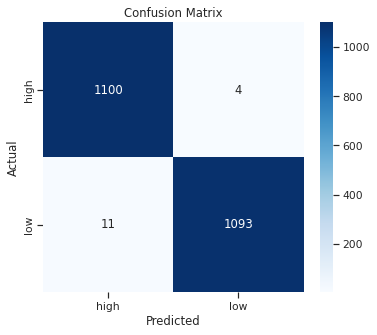

In [ ]:
#display of confusion matrix
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

labels_display = ['high', 'low']
labels_for_cm = [le.transform([label])[0] for label in labels_display]
pred = model.predict(X)
cm = pd.DataFrame(
    confusion_matrix(y, pred, labels=labels_for_cm),
    index=[f"Actual_{l}" for l in labels_display],
    columns=[f"Predicted_{l}" for l in labels_display]
)

print(cm)
def plot_confusion_matrix(y_true, y_pred, display_labels, title="Confusion Matrix"):
    numerical_labels_order = [le.transform([label])[0] for label in display_labels]
    cm = confusion_matrix(y_true, y_pred, labels=numerical_labels_order)

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=True,
                xticklabels=display_labels, yticklabels=display_labels)
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
plot_confusion_matrix(y, pred, labels_display)

### Bagging 50/50 split

In [ ]:
#summary for 50/50 split of bagging
start_time = timeit.default_timer()
model = bagged
model.fit(X_train, y_train)
y_pred_val = model.predict(X_test)
print(confusion_matrix(y_test, y_pred_val))
print(classification_report(y_test, y_pred_val, digits=3))
accuracy = accuracy_score(y_test, y_pred_val)
specificity = confusion_matrix(y_test, y_pred_val)[0, 0] / (confusion_matrix(y_test, y_pred_val)[0, 0] + confusion_matrix(y_test, y_pred_val)[0, 1])
sensitivity = confusion_matrix(y_test, y_pred_val)[1, 1] / (confusion_matrix(y_test, y_pred_val)[1, 0] + confusion_matrix(y_test, y_pred_val)[1, 1])
runtime = timeit.default_timer() - start_time

print(f"Accuracy {accuracy}")
print(f"Specficity {specificity}")
print(f"Sensitivity {sensitivity}")
print("Run time is %s seconds" % runtime)

[[216  23]
 [ 22 180]]
              precision    recall  f1-score   support

           0      0.908     0.904     0.906       239
           1      0.887     0.891     0.889       202

    accuracy                          0.898       441
   macro avg      0.897     0.897     0.897       441
weighted avg      0.898     0.898     0.898       441

Accuracy 0.8979591836734694
Specficity 0.9037656903765691
Sensitivity 0.8910891089108911
Run time is 0.07594931199997745 seconds


             Predicted_high  Predicted_low
Actual_high             216             23
Actual_low               22            180


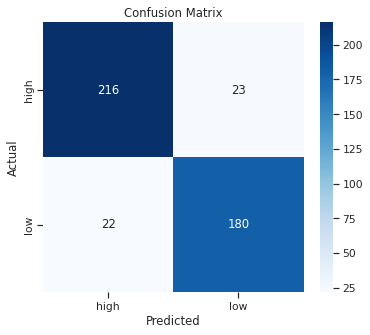

In [ ]:
#display of confusion matrix
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
labels_display = ['high', 'low']
labels_for_cm = [le.transform([label])[0] for label in labels_display]
pred = model.predict(X_test)
cm = pd.DataFrame(
    confusion_matrix(y_test, pred, labels=labels_for_cm),
    index=[f"Actual_{l}" for l in labels_display],
    columns=[f"Predicted_{l}" for l in labels_display]
)

print(cm)
def plot_confusion_matrix(y_true, y_pred, display_labels, title="Confusion Matrix"):
    numerical_labels_order = [le.transform([label])[0] for label in display_labels]
    cm = confusion_matrix(y_true, y_pred, labels=numerical_labels_order)

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=True,
                xticklabels=display_labels, yticklabels=display_labels)
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

plot_confusion_matrix(y_test, pred, labels_display)

### Bagging CV

In [ ]:
#summary of 5-fold CV on bagging
start_time = timeit.default_timer()
acc_score = []
Truth = []
Output = []
crossvalidation = KFold(n_splits=5, random_state=2, shuffle=True)

for fold, (train_index, test_index) in enumerate(crossvalidation.split(X), 1):
    print(f"\nFold {fold}")
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model = bagged
    model.fit(X_train, y_train)

    pred_values = model.predict(X_test)
    acc = accuracy_score(y_test, pred_values)
    acc_score.append(acc)

    Truth.extend(y_test)
    Output.extend(pred_values)

    print(confusion_matrix(y_test, pred_values))
    print(classification_report(y_test, pred_values, digits=3))
elapsed = timeit.default_timer() - start_time
print("\n--- Run time is %s seconds ---" % elapsed)
print('\nAccuracy of each fold: \n', acc_score)
print('\nAverage accuracy: \n', np.mean(acc_score))
print('\nStandard deviation of accuracy: \n', np.std(acc_score))
print(confusion_matrix(Truth, Output))
print(classification_report(Truth, Output, digits=3))
accuracy = accuracy_score(Truth, Output)
specificity = confusion_matrix(Truth, Output)[0, 0] / (confusion_matrix(Truth, Output)[0, 0] + confusion_matrix(Truth, Output)[0, 1])
sensitivity = confusion_matrix(Truth, Output)[1, 1] / (confusion_matrix(Truth, Output)[1, 0] + confusion_matrix(Truth, Output)[1, 1])
runtime = timeit.default_timer() - start_time

print(f"Accuracy {accuracy}")
print(f"Specficity {specificity}")
print(f"Sensitivity {sensitivity}")
print("Run time is %s seconds" % runtime)



Fold 1
[[215  15]
 [ 21 191]]
              precision    recall  f1-score   support

           0      0.911     0.935     0.923       230
           1      0.927     0.901     0.914       212

    accuracy                          0.919       442
   macro avg      0.919     0.918     0.918       442
weighted avg      0.919     0.919     0.918       442


Fold 2
[[203  13]
 [ 20 206]]
              precision    recall  f1-score   support

           0      0.910     0.940     0.925       216
           1      0.941     0.912     0.926       226

    accuracy                          0.925       442
   macro avg      0.925     0.926     0.925       442
weighted avg      0.926     0.925     0.925       442


Fold 3
[[183  24]
 [ 31 204]]
              precision    recall  f1-score   support

           0      0.855     0.884     0.869       207
           1      0.895     0.868     0.881       235

    accuracy                          0.876       442
   macro avg      0.875     0.876  

[[1015   89]
 [ 112  992]]


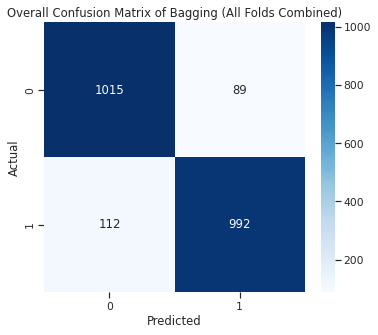

In [ ]:
#display of confusion matrix
cm = confusion_matrix(Truth, Output)
print(cm)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.title("Overall Confusion Matrix of Bagging (All Folds Combined)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

###ROC CURVE

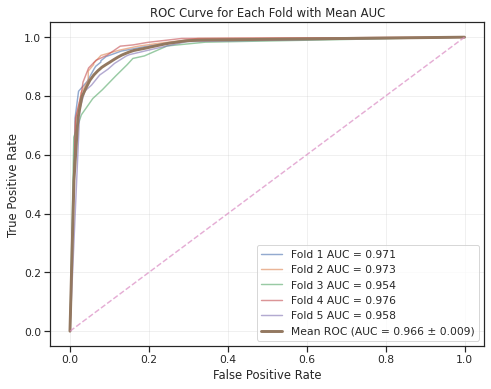

In [ ]:
#ROC curve for 5-fold cv of bagging
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

cv = KFold(n_splits=5, random_state=2, shuffle=True)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

plt.figure(figsize=(8, 6))

for fold, (train_idx, test_idx) in enumerate(cv.split(X), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    model = bagged
    model.fit(X_train, y_train)
    try:
        y_score = model.predict_proba(X_test)[:, 1]
    except:
        y_score = model.decision_function(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_score)
    fold_auc = auc(fpr, tpr)
    aucs.append(fold_auc)
    tpr_interp = np.interp(mean_fpr, fpr, tpr)
    tpr_interp[0] = 0.0
    tprs.append(tpr_interp)
    plt.plot(fpr, tpr, alpha=0.6, label=f"Fold {fold} AUC = {fold_auc:.3f}")
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)

plt.plot(
    mean_fpr,
    mean_tpr,
    linewidth=3,
    label=f"Mean ROC (AUC = {mean_auc:.3f} ± {std_auc:.3f})"
)
plt.plot([0, 1], [0, 1], linestyle="--", alpha=0.7)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Each Fold with Mean AUC")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()


### Random Forest

In [ ]:
rf = RandomForestClassifier(max_features = X.shape[1], random_state = 2)
rf.fit(X, y)

RandomForestClassifier(max_features=4, random_state=2)

In [ ]:
#summary of full model on RF
start_time = timeit.default_timer()
model = rf
model.fit(X, y)
y_pred_full = model.predict(X)
print(confusion_matrix(y, y_pred_full))
print(classification_report(y, y_pred_full, digits=3))
accuracy = accuracy_score(y, y_pred_full)
specificity = confusion_matrix(y, y_pred_full)[0, 0] / (confusion_matrix(y, y_pred_full)[0, 0] + confusion_matrix(y, y_pred_full)[0, 1])
sensitivity = confusion_matrix(y, y_pred_full)[1, 1] / (confusion_matrix(y, y_pred_full)[1, 0] + confusion_matrix(y, y_pred_full)[1, 1])
runtime = timeit.default_timer() - start_time

print(f"Accuracy {accuracy}")
print(f"Specficity {specificity}")
print(f"Sensitivity {sensitivity}")
print("Run time is %s seconds" % runtime)

[[1102    2]
 [   0 1104]]
              precision    recall  f1-score   support

           0      1.000     0.998     0.999      1104
           1      0.998     1.000     0.999      1104

    accuracy                          0.999      2208
   macro avg      0.999     0.999     0.999      2208
weighted avg      0.999     0.999     0.999      2208

Accuracy 0.9990942028985508
Specficity 0.9981884057971014
Sensitivity 1.0
Run time is 0.5475215879999951 seconds


             Predicted_high  Predicted_low
Actual_high            1102              2
Actual_low                0           1104


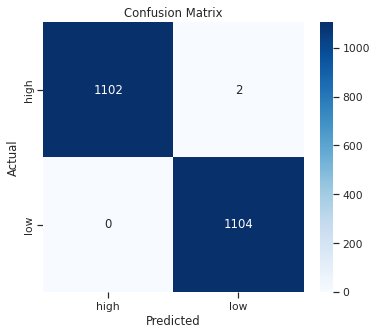

In [ ]:
#display of confusion matrix
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
labels_display = ['high', 'low']
labels_for_cm = [le.transform([label])[0] for label in labels_display]
pred = model.predict(X)
cm = pd.DataFrame(
    confusion_matrix(y, pred, labels=labels_for_cm),
    index=[f"Actual_{l}" for l in labels_display],
    columns=[f"Predicted_{l}" for l in labels_display]
)
print(cm)

def plot_confusion_matrix(y_true, y_pred, display_labels, title="Confusion Matrix"):
    numerical_labels_order = [le.transform([label])[0] for label in display_labels]
    cm = confusion_matrix(y_true, y_pred, labels=numerical_labels_order)

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=True,
                xticklabels=display_labels, yticklabels=display_labels)
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

plot_confusion_matrix(y, pred, labels_display)

### RF split

In [ ]:
#summary of 50/50 split data for RF
start_time = timeit.default_timer()
model = rf
model.fit(X_train, y_train)
y_pred_val = model.predict(X_test)
print(confusion_matrix(y_test, y_pred_val))
print(classification_report(y_test, y_pred_val, digits=3))
accuracy = accuracy_score(y_test, y_pred_val)
specificity = confusion_matrix(y_test, y_pred_val)[0, 0] / (confusion_matrix(y_test, y_pred_val)[0, 0] + confusion_matrix(y_test, y_pred_val)[0, 1])
sensitivity = confusion_matrix(y_test, y_pred_val)[1, 1] / (confusion_matrix(y_test, y_pred_val)[1, 0] + confusion_matrix(y_test, y_pred_val)[1, 1])
runtime = timeit.default_timer() - start_time

print(f"Accuracy {accuracy}")
print(f"Specficity {specificity}")
print(f"Sensitivity {sensitivity}")
print("Run time is %s seconds" % runtime)

[[214  25]
 [ 21 181]]
              precision    recall  f1-score   support

           0      0.911     0.895     0.903       239
           1      0.879     0.896     0.887       202

    accuracy                          0.896       441
   macro avg      0.895     0.896     0.895       441
weighted avg      0.896     0.896     0.896       441

Accuracy 0.8956916099773242
Specficity 0.895397489539749
Sensitivity 0.8960396039603961
Run time is 0.43874224899997216 seconds


             Predicted_high  Predicted_low
Actual_high             214             25
Actual_low               21            181


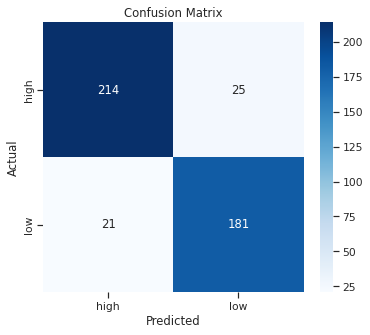

In [ ]:
#display of confusion matrix
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
labels_display = ['high', 'low']
labels_for_cm = [le.transform([label])[0] for label in labels_display]
pred = model.predict(X_test)
cm = pd.DataFrame(
    confusion_matrix(y_test, pred, labels=labels_for_cm),
    index=[f"Actual_{l}" for l in labels_display],
    columns=[f"Predicted_{l}" for l in labels_display]
)
print(cm)

def plot_confusion_matrix(y_true, y_pred, display_labels, title="Confusion Matrix"):
    numerical_labels_order = [le.transform([label])[0] for label in display_labels]
    cm = confusion_matrix(y_true, y_pred, labels=numerical_labels_order)

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=True,
                xticklabels=display_labels, yticklabels=display_labels)
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

plot_confusion_matrix(y_test, pred, labels_display)

### Rf CV

Max features: 1
Avg CV accuracy: 0.9130

Confusion Matrix:
[[216  23]
 [ 18 184]]

Classification Report:
              precision    recall  f1-score   support

           0      0.923     0.904     0.913       239
           1      0.889     0.911     0.900       202

    accuracy                          0.907       441
   macro avg      0.906     0.907     0.907       441
weighted avg      0.907     0.907     0.907       441

Accuracy     : 0.9070
Specificity  : 0.9038
Sensitivity  : 0.9109
Runtime      : 1.62 seconds
Max features: 2
Avg CV accuracy: 0.9167

Confusion Matrix:
[[215  24]
 [ 19 183]]

Classification Report:
              precision    recall  f1-score   support

           0      0.919     0.900     0.909       239
           1      0.884     0.906     0.895       202

    accuracy                          0.902       441
   macro avg      0.901     0.903     0.902       441
weighted avg      0.903     0.902     0.903       441

Accuracy     : 0.9025
Specificity  : 0.8

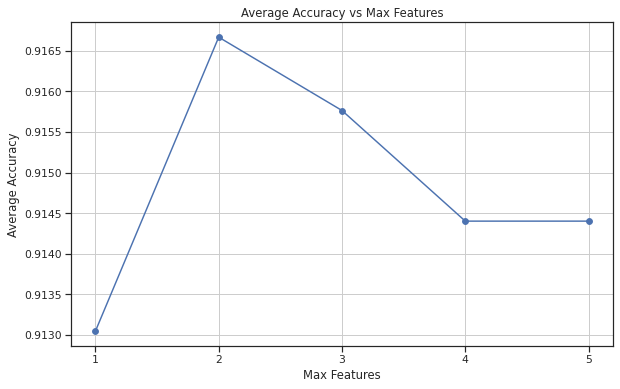

In [ ]:
#summary of 5-fold CV for RF
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import KFold, cross_val_score
import timeit
import numpy as np
crossvalidation = KFold(n_splits=5, random_state=2, shuffle=True)
max_features_list = range(1, 6)
average_accuracies = []

start_time = timeit.default_timer()

for max_feature in max_features_list:
    model = RandomForestClassifier(max_features=max_feature, random_state=2)
    scores = cross_val_score(model, X, y, cv=crossvalidation)
    avg_accuracy = scores.mean()
    average_accuracies.append(avg_accuracy)
    model.fit(X_train, y_train)
    y_pred_val = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred_val)
    accuracy = accuracy_score(y_test, y_pred_val)
    specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
    sensitivity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
    runtime = timeit.default_timer() - start_time

    print(f"Max features: {max_feature}")
    print(f"Avg CV accuracy: {avg_accuracy:.4f}")
    print("\nConfusion Matrix:")
    print(cm)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred_val, digits=3))
    print(f"Accuracy     : {accuracy:.4f}")
    print(f"Specificity  : {specificity:.4f}")
    print(f"Sensitivity  : {sensitivity:.4f}")
    print(f"Runtime      : {runtime:.2f} seconds")
elapsed = timeit.default_timer() - start_time
print("\n--- Run time is %s seconds ---" % elapsed)

print('\nAccuracy of each fold: \n', acc_score)
print('\nAverage accuracy: \n', np.mean(acc_score))
print('\nStandard deviation of accuracy: \n', np.std(acc_score))
print(confusion_matrix(Truth, Output))
print(classification_report(Truth, Output, digits=3))
accuracy = accuracy_score(Truth, Output)
specificity = confusion_matrix(Truth, Output)[0, 0] / (confusion_matrix(Truth, Output)[0, 0] + confusion_matrix(Truth, Output)[0, 1])
sensitivity = confusion_matrix(Truth, Output)[1, 1] / (confusion_matrix(Truth, Output)[1, 0] + confusion_matrix(Truth, Output)[1, 1])
runtime = timeit.default_timer() - start_time

print(f"Accuracy {accuracy}")
print(f"Specficity {specificity}")
print(f"Sensitivity {sensitivity}")
print("Run time is %s seconds" % runtime)

plt.figure(figsize=(10, 6))
plt.plot(max_features_list, average_accuracies, marker='o')
plt.title('Average Accuracy vs Max Features')
plt.xlabel('Max Features')
plt.ylabel('Average Accuracy')
plt.xticks(max_features_list)
plt.grid(True)
plt.show()

[[216  23]
 [ 22 180]]


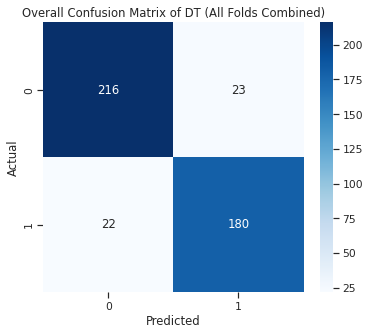

In [ ]:
#display of confusion matrix
cm = confusion_matrix(y_test, pred_values)
print(cm)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.title("Overall Confusion Matrix of DT (All Folds Combined)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### ROC CURVE

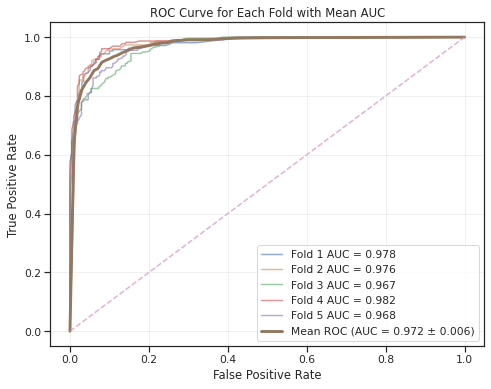

In [ ]:
#ROC curve for 5-fold cv on RF
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
cv = KFold(n_splits=5, random_state=2, shuffle=True)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
plt.figure(figsize=(8, 6))

for fold, (train_idx, test_idx) in enumerate(cv.split(X), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    model = rf
    model.fit(X_train, y_train)
    try:
        y_score = model.predict_proba(X_test)[:, 1]
    except:
        y_score = model.decision_function(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_score)
    fold_auc = auc(fpr, tpr)
    aucs.append(fold_auc)
    tpr_interp = np.interp(mean_fpr, fpr, tpr)
    tpr_interp[0] = 0.0
    tprs.append(tpr_interp)

    plt.plot(fpr, tpr, alpha=0.6, label=f"Fold {fold} AUC = {fold_auc:.3f}")

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)

plt.plot(
    mean_fpr,
    mean_tpr,
    linewidth=3,
    label=f"Mean ROC (AUC = {mean_auc:.3f} ± {std_auc:.3f})"
)

plt.plot([0, 1], [0, 1], linestyle="--", alpha=0.7)

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Each Fold with Mean AUC")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()


### ADABoost

In [ ]:
aboost = AdaBoostClassifier(n_estimators=500,
                           learning_rate = 0.1,
                           algorithm="SAMME",
                           random_state=2)
aboost.fit(X, y)

/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


AdaBoostClassifier(algorithm='SAMME', learning_rate=0.1, n_estimators=500,
                   random_state=2)

In [ ]:
#summary of full data for ADAB
import numpy as np
from sklearn.metrics import (
    confusion_matrix, classification_report, accuracy_score,
    roc_auc_score
)
import timeit

start_time = timeit.default_timer()

model = aboost
model.fit(X, y)
y_pred_full = model.predict(X)
cm = confusion_matrix(y, y_pred_full)
print(cm)
print(classification_report(y, y_pred_full, digits=3))
accuracy = accuracy_score(y, y_pred_full)
specificity = cm[0,0] / (cm[0,0] + cm[0,1])
sensitivity = cm[1,1] / (cm[1,0] + cm[1,1])
n = len(y)
std_error = np.sqrt(accuracy * (1 - accuracy) / n)
if hasattr(model, "predict_proba"):
    y_scores = model.predict_proba(X)[:, 1]
    auc_val = roc_auc_score(y, y_scores)
elif hasattr(model, "decision_function"):
    y_scores = model.decision_function(X)
    auc_val = roc_auc_score(y, y_scores)
else:
    auc_val = roc_auc_score(y, y_pred_full)

runtime = timeit.default_timer() - start_time

print(f"Accuracy: {accuracy}")
print(f"Specificity: {specificity}")
print(f"Sensitivity: {sensitivity}")
print(f"Standard Error of Accuracy: {std_error}")
print(f"AUC: {auc_val}")
print(f"Run time is {runtime} seconds")


/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


[[1023   81]
 [  86 1018]]
              precision    recall  f1-score   support

           0      0.922     0.927     0.925      1104
           1      0.926     0.922     0.924      1104

    accuracy                          0.924      2208
   macro avg      0.924     0.924     0.924      2208
weighted avg      0.924     0.924     0.924      2208

Accuracy: 0.9243659420289855
Specificity: 0.9266304347826086
Sensitivity: 0.9221014492753623
Standard Error of Accuracy: 0.005627054666845235
AUC: 0.9812079920184835
Run time is 5.085068561999833 seconds


             Predicted_high  Predicted_low
Actual_high            1023             81
Actual_low               86           1018


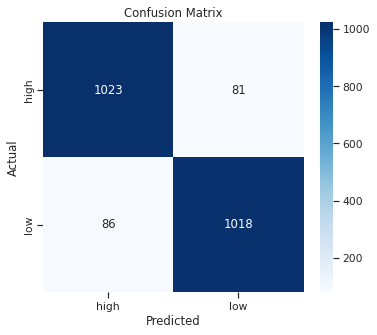

In [ ]:
#display of confusion matrix
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

labels_display = ['high', 'low']

labels_for_cm = [le.transform([label])[0] for label in labels_display]
pred = model.predict(X)
cm = pd.DataFrame(
    confusion_matrix(y, pred, labels=labels_for_cm),
    index=[f"Actual_{l}" for l in labels_display],
    columns=[f"Predicted_{l}" for l in labels_display]
)
print(cm)

def plot_confusion_matrix(y_true, y_pred, display_labels, title="Confusion Matrix"):
    numerical_labels_order = [le.transform([label])[0] for label in display_labels]
    cm = confusion_matrix(y_true, y_pred, labels=numerical_labels_order)

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=True,
                xticklabels=display_labels, yticklabels=display_labels)
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

plot_confusion_matrix(y, pred, labels_display)

### ADA Boost split

In [ ]:
#summary of 50/50 data split for ADAB
import numpy as np
from sklearn.metrics import (
    confusion_matrix, classification_report, accuracy_score,
    roc_auc_score
)
import timeit

start_time = timeit.default_timer()
model = aboost
model.fit(X_train, y_train)
y_pred_val = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred_val)
print(cm)
print(classification_report(y_test, y_pred_val, digits=3))
accuracy = accuracy_score(y_test, y_pred_val)
specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
sensitivity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
n = len(y_test)
std_error = np.sqrt(accuracy * (1 - accuracy) / n)
if hasattr(model, "predict_proba"):
    y_scores = model.predict_proba(X_test)[:, 1]
    auc_val = roc_auc_score(y_test, y_scores)
elif hasattr(model, "decision_function"):
    y_scores = model.decision_function(X_test)
    auc_val = roc_auc_score(y_test, y_scores)
else:
    auc_val = roc_auc_score(y_test, y_pred_val)  # fallback

runtime = timeit.default_timer() - start_time

print(f"Accuracy: {accuracy}")
print(f"Specificity: {specificity}")
print(f"Sensitivity: {sensitivity}")
print(f"Standard Error of Accuracy: {std_error}")
print(f"AUC: {auc_val}")
print(f"Run time: {runtime} seconds")


/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


[[215  24]
 [ 16 186]]
              precision    recall  f1-score   support

           0      0.931     0.900     0.915       239
           1      0.886     0.921     0.903       202

    accuracy                          0.909       441
   macro avg      0.908     0.910     0.909       441
weighted avg      0.910     0.909     0.909       441

Accuracy: 0.909297052154195
Specificity: 0.899581589958159
Sensitivity: 0.9207920792079208
Standard Error of Accuracy: 0.013675534131508535
AUC: 0.9751232445420274
Run time: 7.040357303999372 seconds


             Predicted_high  Predicted_low
Actual_high             215             24
Actual_low               16            186


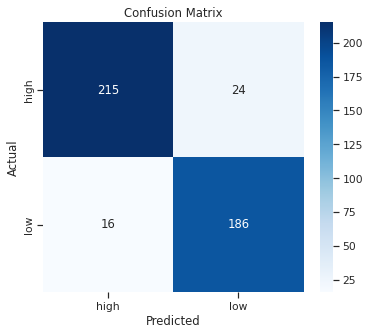

In [ ]:
#display of confusion matrix
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

labels_display = ['high', 'low']

labels_for_cm = [le.transform([label])[0] for label in labels_display]
pred = model.predict(X_test)
cm = pd.DataFrame(
    confusion_matrix(y_test, pred, labels=labels_for_cm),
    index=[f"Actual_{l}" for l in labels_display],
    columns=[f"Predicted_{l}" for l in labels_display]
)
print(cm)

def plot_confusion_matrix(y_true, y_pred, display_labels, title="Confusion Matrix"):
    numerical_labels_order = [le.transform([label])[0] for label in display_labels]
    cm = confusion_matrix(y_true, y_pred, labels=numerical_labels_order)

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=True,
                xticklabels=display_labels, yticklabels=display_labels)
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

plot_confusion_matrix(y_test, pred, labels_display)

### ADA Boost CV

In [ ]:
#summary of 5-fold cv for ADAB
import numpy as np
from sklearn.metrics import (
    confusion_matrix, classification_report, accuracy_score,
    roc_auc_score
)
from sklearn.model_selection import KFold
import timeit

start_time = timeit.default_timer()
acc_score = []
auc_score = []
Truth = []
Output_probs = []
Output_preds = []
crossvalidation = KFold(n_splits=5, random_state=2, shuffle=True)
for fold, (train_index, test_index) in enumerate(crossvalidation.split(X), 1):
    print(f"\nFold {fold}")
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model = aboost
    model.fit(X_train, y_train)
    pred_values = model.predict(X_test)
    pred_probs = model.predict_proba(X_test)[:, 1]
    acc = accuracy_score(y_test, pred_values)
    acc_score.append(acc)
    auc = roc_auc_score(y_test, pred_probs)
    auc_score.append(auc)
    Truth.extend(y_test)
    Output_preds.extend(pred_values)
    Output_probs.extend(pred_probs)
    print(confusion_matrix(y_test, pred_values))
    print(classification_report(y_test, pred_values, digits=3))

elapsed = timeit.default_timer() - start_time

print("\nAccuracy of each fold:\n", acc_score)
print("Average accuracy:", np.mean(acc_score))
print("Accuracy SD:", np.std(acc_score))

print("\nAUC of each fold:\n", auc_score)
print("Average AUC:", np.mean(auc_score))
print("AUC SD:", np.std(auc_score))

print("\nOverall Confusion Matrix:")
print(confusion_matrix(Truth, Output_preds))

print("\nOverall Classification Report:")
print(classification_report(Truth, Output_preds, digits=3))
accuracy = accuracy_score(Truth, Output_preds)

cm = confusion_matrix(Truth, Output_preds)
specificity = cm[0,0] / (cm[0,0] + cm[0,1])
sensitivity = cm[1,1] / (cm[1,0] + cm[1,1])

n = len(Truth)
std_error = np.sqrt(accuracy * (1 - accuracy) / n)
overall_auc = roc_auc_score(Truth, Output_probs)

runtime = timeit.default_timer() - start_time
print(f"\nOverall Accuracy: {accuracy}")
print(f"Specificity: {specificity}")
print(f"Sensitivity: {sensitivity}")
print(f"Standard Error of Accuracy: {std_error}")
print(f"Overall AUC: {overall_auc}")
print("Run time: %s seconds" % runtime)




Fold 1


/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


[[213  17]
 [ 17 195]]
              precision    recall  f1-score   support

           0      0.926     0.926     0.926       230
           1      0.920     0.920     0.920       212

    accuracy                          0.923       442
   macro avg      0.923     0.923     0.923       442
weighted avg      0.923     0.923     0.923       442


Fold 2


/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


[[203  13]
 [ 16 210]]
              precision    recall  f1-score   support

           0      0.927     0.940     0.933       216
           1      0.942     0.929     0.935       226

    accuracy                          0.934       442
   macro avg      0.934     0.935     0.934       442
weighted avg      0.934     0.934     0.934       442


Fold 3


/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


[[186  21]
 [ 25 210]]
              precision    recall  f1-score   support

           0      0.882     0.899     0.890       207
           1      0.909     0.894     0.901       235

    accuracy                          0.896       442
   macro avg      0.895     0.896     0.896       442
weighted avg      0.896     0.896     0.896       442


Fold 4


/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


[[195  17]
 [ 14 215]]
              precision    recall  f1-score   support

           0      0.933     0.920     0.926       212
           1      0.927     0.939     0.933       229

    accuracy                          0.930       441
   macro avg      0.930     0.929     0.930       441
weighted avg      0.930     0.930     0.930       441


Fold 5


/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


[[215  24]
 [ 16 186]]
              precision    recall  f1-score   support

           0      0.931     0.900     0.915       239
           1      0.886     0.921     0.903       202

    accuracy                          0.909       441
   macro avg      0.908     0.910     0.909       441
weighted avg      0.910     0.909     0.909       441


Accuracy of each fold:
 [0.9230769230769231, 0.9343891402714932, 0.8959276018099548, 0.9297052154195011, 0.909297052154195]
Average accuracy: 0.9184791865464135
Accuracy SD: 0.014093793663311505

AUC of each fold:
 [np.float64(0.9806808859721082), np.float64(0.9781116846935431), np.float64(0.9665536026313084), np.float64(0.9843453901293565), np.float64(0.9751232445420274)]
Average AUC: 0.9769629615936688
AUC SD: 0.00602299079139074

Overall Confusion Matrix:
[[1012   92]
 [  88 1016]]

Overall Classification Report:
              precision    recall  f1-score   support

           0      0.920     0.917     0.918      1104
           1      

             Predicted_high  Predicted_low
Actual_high            1016             88
Actual_low               85           1019


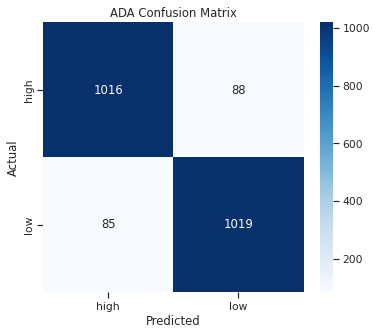

In [ ]:
#confusion matrix display
labels_display = ['high', 'low']

labels_for_cm = [le.transform([label])[0] for label in labels_display]
pred = model.predict(X)
cm = pd.DataFrame(
    confusion_matrix(y, pred, labels=labels_for_cm),
    index=[f"Actual_{l}" for l in labels_display],
    columns=[f"Predicted_{l}" for l in labels_display]
)
print(cm)

def plot_confusion_matrix(y_true, y_pred, display_labels, title="ADA Confusion Matrix"):
    numerical_labels_order = [le.transform([label])[0] for label in display_labels]
    cm = confusion_matrix(y_true, y_pred, labels=numerical_labels_order)

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=True,
                xticklabels=display_labels, yticklabels=display_labels)
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

plot_confusion_matrix(y, pred, labels_display)

### ROC Curve

/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 

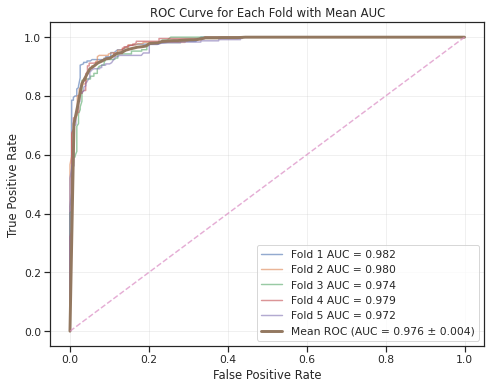

In [ ]:
#ROC curve for 5-fold cv for ADAB
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

cv = KFold(n_splits=5, random_state=42, shuffle=True)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
plt.figure(figsize=(8, 6))

for fold, (train_idx, test_idx) in enumerate(cv.split(X), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    model = aboost
    model.fit(X_train, y_train)
    try:
        y_score = model.predict_proba(X_test)[:, 1]
    except:
        y_score = model.decision_function(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_score)
    fold_auc = auc(fpr, tpr)
    aucs.append(fold_auc)
    tpr_interp = np.interp(mean_fpr, fpr, tpr)
    tpr_interp[0] = 0.0
    tprs.append(tpr_interp)
    plt.plot(fpr, tpr, alpha=0.6, label=f"Fold {fold} AUC = {fold_auc:.3f}")
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)

plt.plot(
    mean_fpr,
    mean_tpr,
    linewidth=3,
    label=f"Mean ROC (AUC = {mean_auc:.3f} ± {std_auc:.3f})"
)

plt.plot([0, 1], [0, 1], linestyle="--", alpha=0.7)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Each Fold with Mean AUC")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()


### XGB Boost

In [ ]:
import xgboost as xgb
XGB =  xgb.XGBClassifier(n_estimators = 500,learning_rate = 0.1,max_depth = 4,random_state = 2)
XGB.fit(X, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=500,
              n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
#summary for full data of XGBB
import numpy as np
from sklearn.metrics import (
    confusion_matrix, classification_report, accuracy_score,
    roc_auc_score
)
import timeit

start_time = timeit.default_timer()
model = XGB
model.fit(X, y)
y_pred_full = model.predict(X)

cm = confusion_matrix(y, y_pred_full)
print(cm)
print(classification_report(y, y_pred_full, digits=3))
accuracy = accuracy_score(y, y_pred_full)
specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
sensitivity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
n = len(y)
std_error = np.sqrt(accuracy * (1 - accuracy) / n)
y_scores = model.predict_proba(X)[:, 1]
auc_val = roc_auc_score(y, y_scores)

runtime = timeit.default_timer() - start_time
print(f"Accuracy: {accuracy}")
print(f"Specificity: {specificity}")
print(f"Sensitivity: {sensitivity}")
print(f"Standard Error of Accuracy: {std_error}")
print(f"AUC: {auc_val}")
print(f"Run time: {runtime} seconds")


[[1076   28]
 [  15 1089]]
              precision    recall  f1-score   support

           0      0.986     0.975     0.980      1104
           1      0.975     0.986     0.981      1104

    accuracy                          0.981      2208
   macro avg      0.981     0.981     0.981      2208
weighted avg      0.981     0.981     0.981      2208

Accuracy: 0.9805253623188406
Specificity: 0.9746376811594203
Sensitivity: 0.9864130434782609
Standard Error of Accuracy: 0.002940793803071908
AUC: 0.9989346217968914
Run time: 0.27899509700000635 seconds


             Predicted_high  Predicted_low
Actual_high            1076             28
Actual_low               15           1089


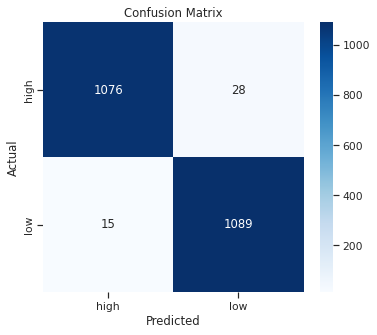

In [ ]:
#display of confusion matrix
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

labels_display = ['high', 'low']

labels_for_cm = [le.transform([label])[0] for label in labels_display]
pred = model.predict(X)
cm = pd.DataFrame(
    confusion_matrix(y, pred, labels=labels_for_cm),
    index=[f"Actual_{l}" for l in labels_display],
    columns=[f"Predicted_{l}" for l in labels_display]
)
print(cm)

def plot_confusion_matrix(y_true, y_pred, display_labels, title="Confusion Matrix"):
    numerical_labels_order = [le.transform([label])[0] for label in display_labels]
    cm = confusion_matrix(y_true, y_pred, labels=numerical_labels_order)

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=True,
                xticklabels=display_labels, yticklabels=display_labels)
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

plot_confusion_matrix(y, pred, labels_display)

### XGB Boost split

In [ ]:
#summary of 50/50 split for XGBB
import numpy as np
from sklearn.metrics import (
    confusion_matrix, classification_report, accuracy_score,
    roc_auc_score
)
import timeit
start_time = timeit.default_timer()
model = XGB
model.fit(X_train, y_train)
y_pred_val = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred_val)
print(cm)
print(classification_report(y_test, y_pred_val, digits=3))
accuracy = accuracy_score(y_test, y_pred_val)
specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
sensitivity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
n = len(y_test)
std_error = np.sqrt(accuracy * (1 - accuracy) / n)
y_scores = model.predict_proba(X_test)[:, 1]
auc_val = roc_auc_score(y_test, y_scores)

runtime = timeit.default_timer() - start_time

print(f"Accuracy: {accuracy}")
print(f"Specificity: {specificity}")
print(f"Sensitivity: {sensitivity}")
print(f"Standard Error of Accuracy: {std_error}")
print(f"AUC: {auc_val}")
print(f"Run time: {runtime} seconds")


[[211  28]
 [ 12 190]]
              precision    recall  f1-score   support

           0      0.946     0.883     0.913       239
           1      0.872     0.941     0.905       202

    accuracy                          0.909       441
   macro avg      0.909     0.912     0.909       441
weighted avg      0.912     0.909     0.909       441

Accuracy: 0.909297052154195
Specificity: 0.8828451882845189
Sensitivity: 0.9405940594059405
Standard Error of Accuracy: 0.013675534131508535
AUC: 0.9709598574920254
Run time: 0.21724883999922895 seconds


             Predicted_high  Predicted_low
Actual_high             211             28
Actual_low               12            190


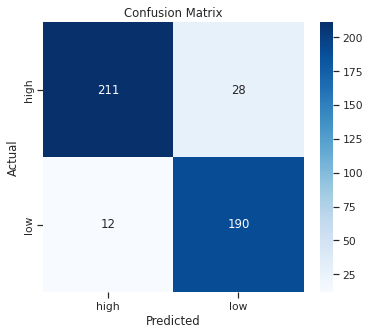

In [ ]:
#display of confusion matrix
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

labels_display = ['high', 'low']
labels_for_cm = [le.transform([label])[0] for label in labels_display]
pred = model.predict(X_test)
cm = pd.DataFrame(
    confusion_matrix(y_test, pred, labels=labels_for_cm),
    index=[f"Actual_{l}" for l in labels_display],
    columns=[f"Predicted_{l}" for l in labels_display]
)
print(cm)

def plot_confusion_matrix(y_true, y_pred, display_labels, title="Confusion Matrix"):
    numerical_labels_order = [le.transform([label])[0] for label in display_labels]
    cm = confusion_matrix(y_true, y_pred, labels=numerical_labels_order)

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=True,
                xticklabels=display_labels, yticklabels=display_labels)
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

plot_confusion_matrix(y_test, pred, labels_display)

### XGB Boost CV

In [ ]:
#summary of 5-fold cv on XGBB
import numpy as np
from sklearn.metrics import (
    confusion_matrix, classification_report, accuracy_score,
    roc_auc_score
)
from sklearn.model_selection import KFold
import timeit

start_time = timeit.default_timer()
acc_score = []
auc_score = []
Truth = []
Output_preds = []
Output_probs = []

crossvalidation = KFold(n_splits=5, random_state=2, shuffle=True)

for fold, (train_index, test_index) in enumerate(crossvalidation.split(X), 1):
    print(f"\nFold {fold}")
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model = XGB
    model.fit(X_train, y_train)
    pred_values = model.predict(X_test)
    pred_probs = model.predict_proba(X_test)[:, 1]
    acc = accuracy_score(y_test, pred_values)
    acc_score.append(acc)
    auc = roc_auc_score(y_test, pred_probs)
    auc_score.append(auc)
    Truth.extend(y_test)
    Output_preds.extend(pred_values)
    Output_probs.extend(pred_probs)
    print(confusion_matrix(y_test, pred_values))
    print(classification_report(y_test, pred_values, digits=3)
print("\nAccuracy of each fold:\n", acc_score)
print("Average accuracy:", np.mean(acc_score))
print("Accuracy SD:", np.std(acc_score))
print("\nAUC of each fold:\n", auc_score)
print("Average AUC:", np.mean(auc_score))
print("AUC SD:", np.std(auc_score))
print("\nOverall Confusion Matrix:")
print(confusion_matrix(Truth, Output_preds))
print("\nOverall Classification Report:")
print(classification_report(Truth, Output_preds, digits=3))

accuracy = accuracy_score(Truth, Output_preds)

cm = confusion_matrix(Truth, Output_preds)
specificity = cm[0,0] / (cm[0,0] + cm[0,1])
sensitivity = cm[1,1] / (cm[1,0] + cm[1,1])
n = len(Truth)
std_error = np.sqrt(accuracy * (1 - accuracy) / n)
overall_auc = roc_auc_score(Truth, Output_probs)
runtime = timeit.default_timer() - start_time
print(f"\nOverall Accuracy: {accuracy}")
print(f"Specificity: {specificity}")
print(f"Sensitivity: {sensitivity}")
print(f"Standard Error of Accuracy: {std_error}")
print(f"Overall AUC: {overall_auc}")
print("Run time: %s seconds" % runtime)



Fold 1
[[216  14]
 [ 19 193]]
              precision    recall  f1-score   support

           0      0.919     0.939     0.929       230
           1      0.932     0.910     0.921       212

    accuracy                          0.925       442
   macro avg      0.926     0.925     0.925       442
weighted avg      0.925     0.925     0.925       442


Fold 2
[[201  15]
 [ 13 213]]
              precision    recall  f1-score   support

           0      0.939     0.931     0.935       216
           1      0.934     0.942     0.938       226

    accuracy                          0.937       442
   macro avg      0.937     0.937     0.937       442
weighted avg      0.937     0.937     0.937       442


Fold 3
[[187  20]
 [ 25 210]]
              precision    recall  f1-score   support

           0      0.882     0.903     0.893       207
           1      0.913     0.894     0.903       235

    accuracy                          0.898       442
   macro avg      0.898     0.898  

             Predicted_high  Predicted_low
Actual_high            1064             40
Actual_low               16           1088


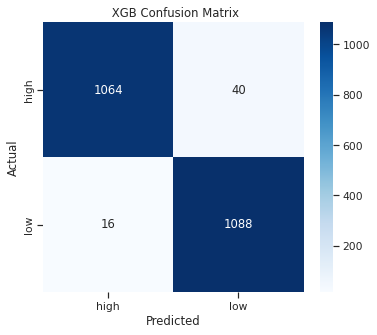

In [ ]:
#display of confusion matrix
labels_display = ['high', 'low']

labels_for_cm = [le.transform([label])[0] for label in labels_display]
pred = model.predict(X)
cm = pd.DataFrame(
    confusion_matrix(y, pred, labels=labels_for_cm),
    index=[f"Actual_{l}" for l in labels_display],
    columns=[f"Predicted_{l}" for l in labels_display]
)
print(cm)

def plot_confusion_matrix(y_true, y_pred, display_labels, title=" XGB Confusion Matrix"):
    numerical_labels_order = [le.transform([label])[0] for label in display_labels]
    cm = confusion_matrix(y_true, y_pred, labels=numerical_labels_order)

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=True,
                xticklabels=display_labels, yticklabels=display_labels)
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

plot_confusion_matrix(y, pred, labels_display)

### ROC Curve

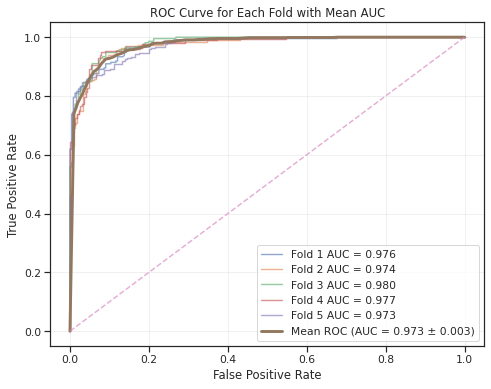

In [ ]:
#ROC curve for 5-fold cv of XGBB
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

cv = KFold(n_splits=5, random_state=42, shuffle=True)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

plt.figure(figsize=(8, 6))

for fold, (train_idx, test_idx) in enumerate(cv.split(X), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    model = XGB
    model.fit(X_train, y_train)
    try:
        y_score = model.predict_proba(X_test)[:, 1]
    except:
        y_score = model.decision_function(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_score)
    fold_auc = auc(fpr, tpr)
    aucs.append(fold_auc)
    tpr_interp = np.interp(mean_fpr, fpr, tpr)
    tpr_interp[0] = 0.0
    tprs.append(tpr_interp)

    plt.plot(fpr, tpr, alpha=0.6, label=f"Fold {fold} AUC = {fold_auc:.3f}")
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)

plt.plot(
    mean_fpr,
    mean_tpr,
    linewidth=3,
    label=f"Mean ROC (AUC = {mean_auc:.3f} ± {std_auc:.3f})"
)

plt.plot([0, 1], [0, 1], linestyle="--", alpha=0.7)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Each Fold with Mean AUC")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()


### Comparison Visuals

In [ ]:
#gathering means for comparison
import numpy as np

print(np.mean(qda_scores))
print(np.mean(nb_scores))
print(np.mean(KNN_scores))

0.8928
0.8825999999999998
0.8847999999999999


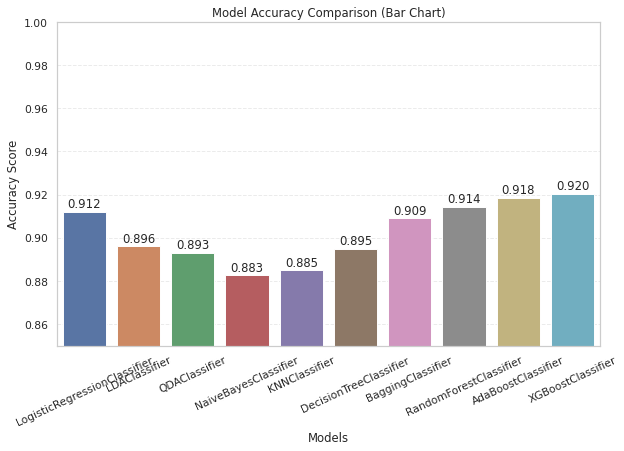

In [ ]:
#comparison barchart
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

scores_of_5_folds = {
    'LogisticRegressionClassifier': 0.912,
    'LDAClassifier': 0.896,
    'QDAClassifier': 0.893,
    'NaiveBayesClassifier': 0.8825999999999998,
    'KNNClassifier' : 0.8847999999999999,
    'DecisionTreeClassifier': 0.8949282277013368,
    'BaggingClassifier': 0.9089707677942972,
    'RandomForestClassifier': 0.9144016580991371,
    'AdaBoostClassifier': 0.9184791865464135,
    'XGBoostClassifier': 0.9202901673489908
}

models = list(scores_of_5_folds.keys())
scores = list(scores_of_5_folds.values())

plt.figure(figsize=(10,6))

sns.barplot(x=models, y=scores, hue=models, palette=sns.color_palette(), legend=False)

plt.title("Model Accuracy Comparison (Bar Chart)")
plt.ylabel("Accuracy Score")
plt.xlabel("Models")
plt.ylim(0.85, 1.0)
plt.xticks(rotation=25)

for i, v in enumerate(scores):
    plt.text(i, v + 0.002, f"{v:.3f}", ha='center')

plt.grid(axis='y', linestyle='--', alpha=0.4)

plt.savefig('model_accuracy_comparison.png')

plt.show()

In [ ]:
logreg_scores = [0.923, 0.923, 0.893, 0.916, 0.907]
lda_scores = [0.903, 0.912, 0.876, 0.909, 0.882]
qda_scores = [0.896, 0.898, 0.877, 0.902, 0.891]
nb_scores = [0.898, 0.905, 0.876, 0.912, 0.822]
KNN_scores = [0.880, 0.903, 0.864, 0.902, 0.875]
dt_scores = [.907, .889, .885, .905, .891]
bag_scores = [.919, .925, .876, .927, .898]
rf_scores = [.907, .902, .905, .896, .896]
ada_scores = [.923, .934, .896, .930, .909]
XGB_scores = [.925, .937, .898, .932, .909]


/tmp/ipython-input-3515641267.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=gdf_melted, x='Classifier', y='Accuracy', palette=sns.color_palette())


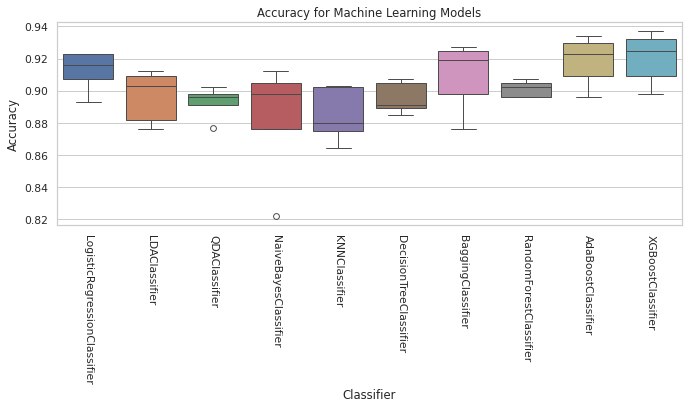

In [ ]:
#Comparison boxplots
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

scores = [logreg_scores, lda_scores, qda_scores, nb_scores, KNN_scores, dt_scores, bag_scores, rf_scores, ada_scores, XGB_scores]
col = ["LogisticRegressionClassifier", "LDAClassifier", "QDAClassifier", "NaiveBayesClassifier", "KNNClassifier","DecisionTreeClassifier", "BaggingClassifier", "RandomForestClassifier",
       "AdaBoostClassifier", "XGBoostClassifier"]

gdf = pd.DataFrame(scores, columns=['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5'], index=col).T

sns.set_theme(style="whitegrid")

gdf_melted = gdf.melt(var_name='Classifier', value_name='Accuracy')

plt.figure(figsize=(10,6))
sns.boxplot(data=gdf_melted, x='Classifier', y='Accuracy', palette=sns.color_palette())

plt.title("Accuracy for Machine Learning Models")
plt.xticks(rotation=270)
plt.ylabel("Accuracy")
plt.tight_layout()
plt.savefig('model_accuracy_comparison.png')
plt.show()


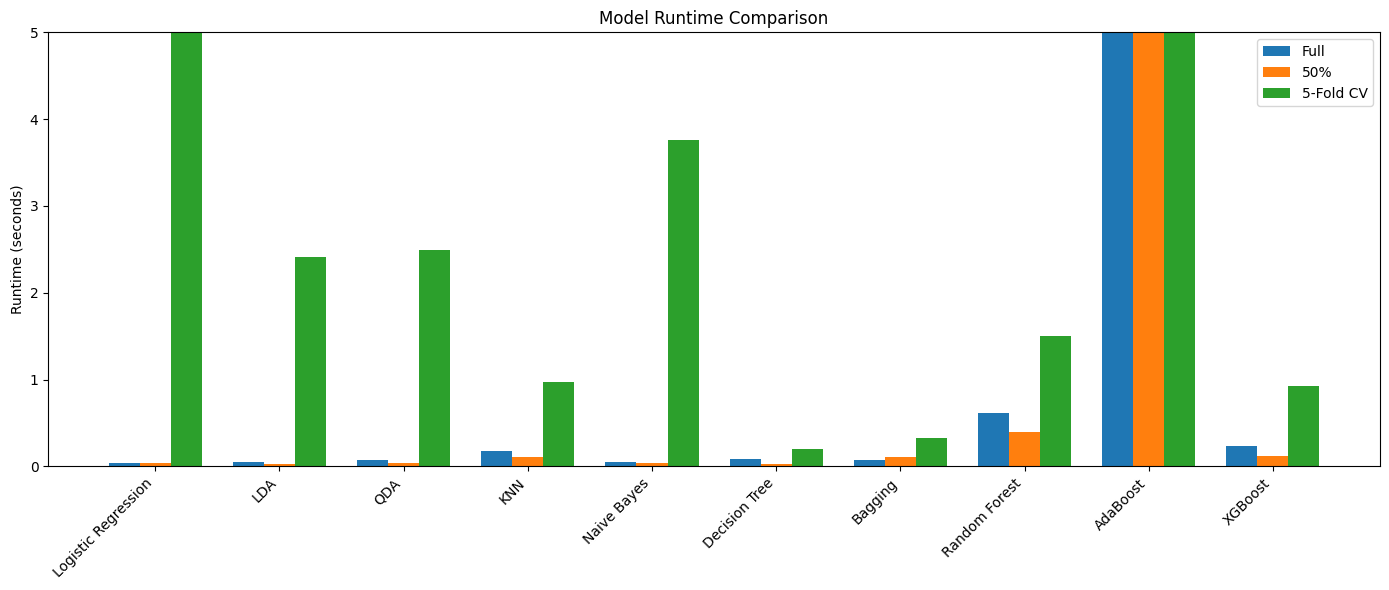

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

models = [
    "Logistic Regression",
    "LDA",
    "QDA",
    "KNN",
    "Naive Bayes",
    "Decision Tree",
    "Bagging",
    "Random Forest",
    "AdaBoost",
    "XGBoost"
]

full = [
    0.040,   # Logistic Regression
    0.048,   # LDA
    0.069,   # QDA
    0.182,   # KNN (average k=1..10)
    0.051,  # Naive Bayes
    0.083,  # Decision Tree
    0.072,  # Bagging
    0.617,  # Random Forest
    5.085,  # AdaBoost
    0.229   # XGBoost
]

half = [
    0.037,   # Logistic Regression
    0.031,   # LDA
    0.041,   # QDA
    0.110,   # KNN (average k=1..10)
    0.036,  # Naive Bayes
    0.025,  # Decision Tree
    0.113,  # Bagging
    0.398,  # Random Forest
    7.040,  # AdaBoost
    0.120   # XGBoost
]

cv = [
    27.914,  # Logistic Regression
    2.413,   # LDA
    2.498,   # QDA
    0.975,   # KNN (average k=1..10)
    3.760,  # Naive Bayes
    0.197,  # Decision Tree
    0.323,  # Bagging
    1.500,  # Random Forest
    16.82,  # AdaBoost
    0.929   # XGBoost
]

x = np.arange(len(models))
width = 0.25

plt.figure(figsize=(14, 6))
plt.bar(x - width, full, width, label="Full")
plt.bar(x,         half, width, label="50%")
plt.bar(x + width, cv,   width, label="5-Fold CV")
plt.ylim(top=5)

plt.xticks(x, models, rotation=45, ha="right")
plt.ylabel("Runtime (seconds)")
plt.title("Model Runtime Comparison")
plt.legend()
plt.tight_layout()
plt.show()
